In [17]:
import os
import random
import numpy as np
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
# import splitfolders #only needed for train/test split folder creation

In [18]:
#here's the line of code I used to split the data into multiple train/test directories with sub folders for each class. 80/20 split inot images/data_split
#the original images stay in "good_images" and are copied to "data_split"
#this cell should only need to be re-run if we need to re-split the images after removing more or something that would change our train/test split images

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#splitfolders.ratio("../images/good_images", output="../images/data_split", seed=42, ratio=(.8, .2), group_prefix=None) # default values


In [19]:
#load images

In [20]:
DATA_PATH = "../images/data_split"

def get_count_metrics(folder, data_path=DATA_PATH):    
    #folder here is either "train" or "val"
    number_normal = len(os.listdir(data_path + "/" + folder + "/normal/"))
    number_bacterial = len(os.listdir(data_path + "/" + folder + "/bacterial/"))
    number_covid = len(os.listdir(data_path + "/" + folder + "/covid-19/"))
    number_viral = len(os.listdir(data_path + "/" + folder + "/viral/"))

    
    return number_normal, number_bacterial,number_covid,number_viral

def load_data(data_path=DATA_PATH, batch_size=32):
    
    '''
    https://pytorch.org/docs/stable/torchvision/transforms.html)
    '''
    train_base_trans = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3),
        transforms.ToTensor()
        ])

    test_base_trans = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3),
        transforms.ToTensor()
        ])

    
    train_red_trans = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomRotation(30),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.GaussianBlur(3),
        #transforms.Lambda(lambda img: torchvision.transforms.functional.equalize(img)),
        transforms.ToTensor(),
        transforms.ColorJitter(brightness=.2, contrast=.2),
        
        ])

    test_red_trans = transforms.Compose([
        transforms.Resize(256),
        #transforms.RandomRotation(20),
        transforms.CenterCrop(224),
        #transforms.RandomHorizontalFlip(),
        #transforms.Grayscale(),
        #transforms.GaussianBlur(),
        #transforms.functional.rgb_to_grayscale(),
        transforms.ToTensor()
        #transforms.Normalize(.5,.25)
        #transforms.ColorJitter(brightness=.2, contrast=.2),
        
        ])

    
    trn_data = torchvision.datasets.ImageFolder(root=data_path + "/train/", transform=train_base_trans)
    val_data = torchvision.datasets.ImageFolder(root=data_path  + "/val/", transform=test_base_trans)
    
    print(trn_data.class_to_idx)
    print(val_data.class_to_idx)
        
    train_loader_base = torch.utils.data.DataLoader(trn_data, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader_base = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False, drop_last=False)


    trn_red_data = torchvision.datasets.ImageFolder(root=data_path + "/train/", transform=train_red_trans)
    val_red_data = torchvision.datasets.ImageFolder(root=data_path  + "/val/", transform=test_red_trans)
    
    train_loader_red = torch.utils.data.DataLoader(trn_red_data, batch_size=batch_size, shuffle=True, drop_last=False)
    val_loader_red = torch.utils.data.DataLoader(val_red_data, batch_size=batch_size, shuffle=False, drop_last=False)
    
    return train_loader_base, val_loader_base, train_loader_red, val_loader_red

{'bacterial': 0, 'covid-19': 1, 'normal': 2, 'viral': 3}
{'bacterial': 0, 'covid-19': 1, 'normal': 2, 'viral': 3}

Train
(1260, 2217, 233, 1194)

Test
(315, 555, 59, 299)


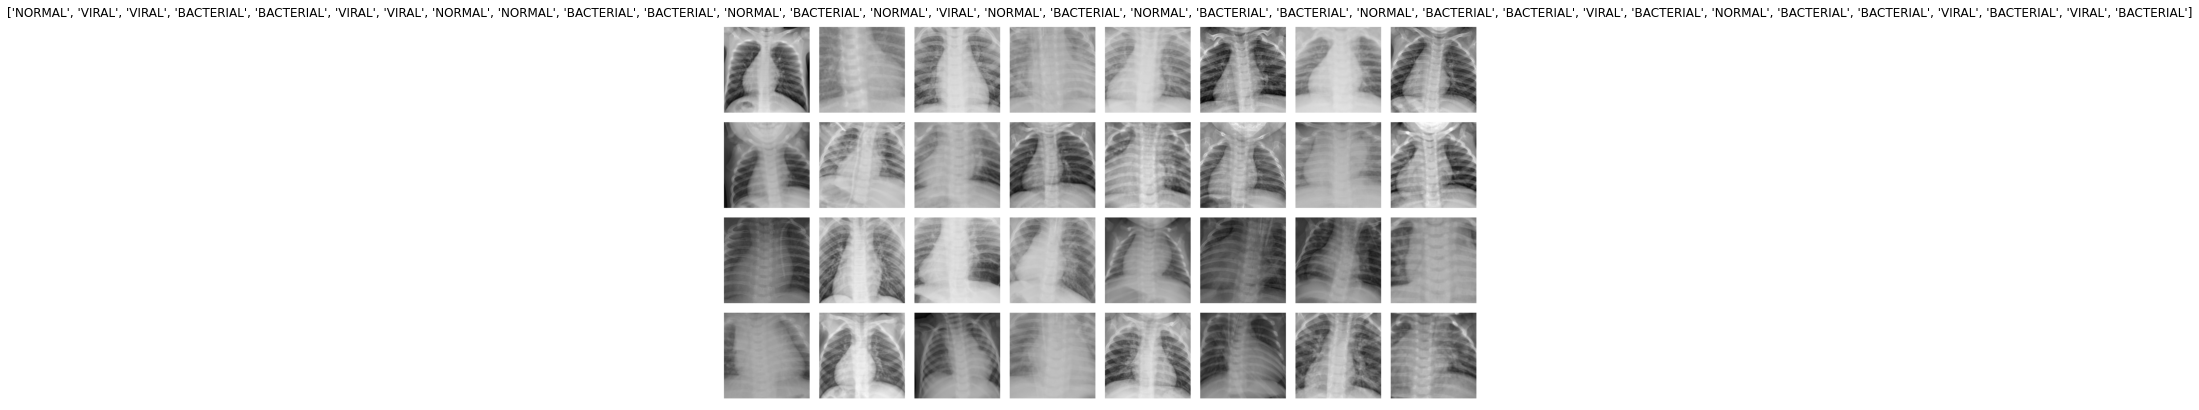

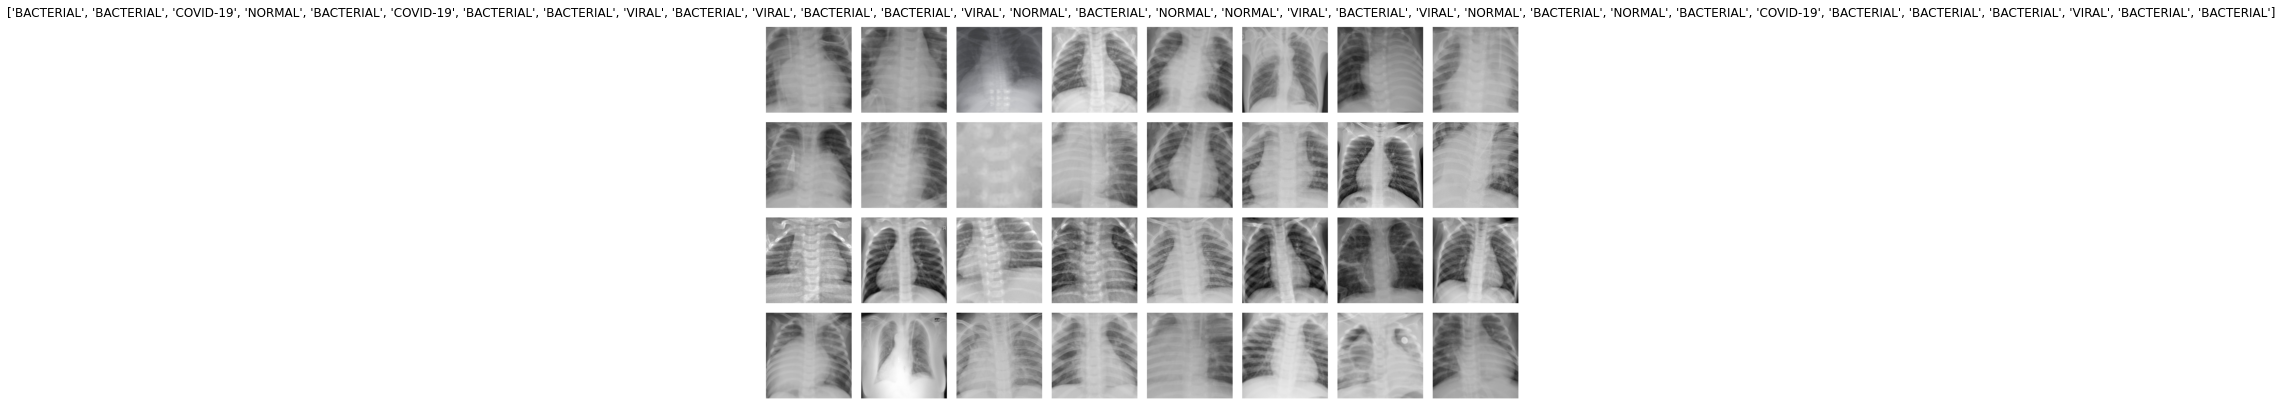

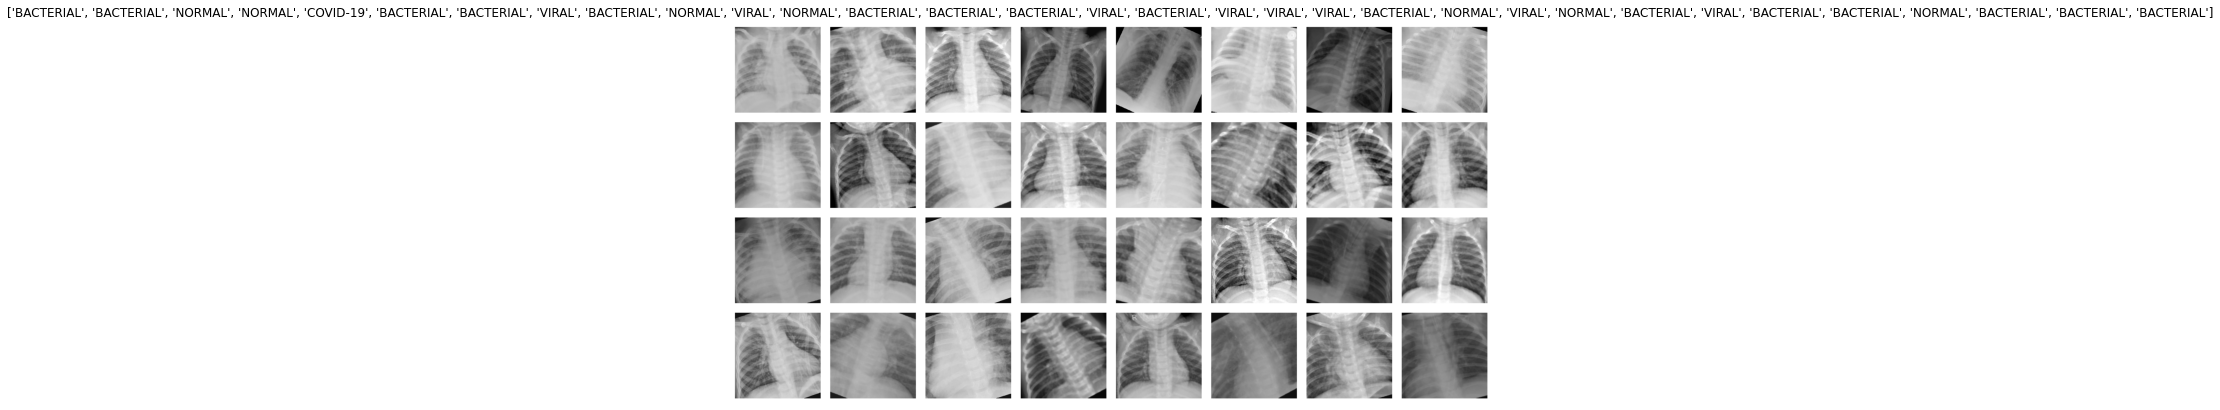

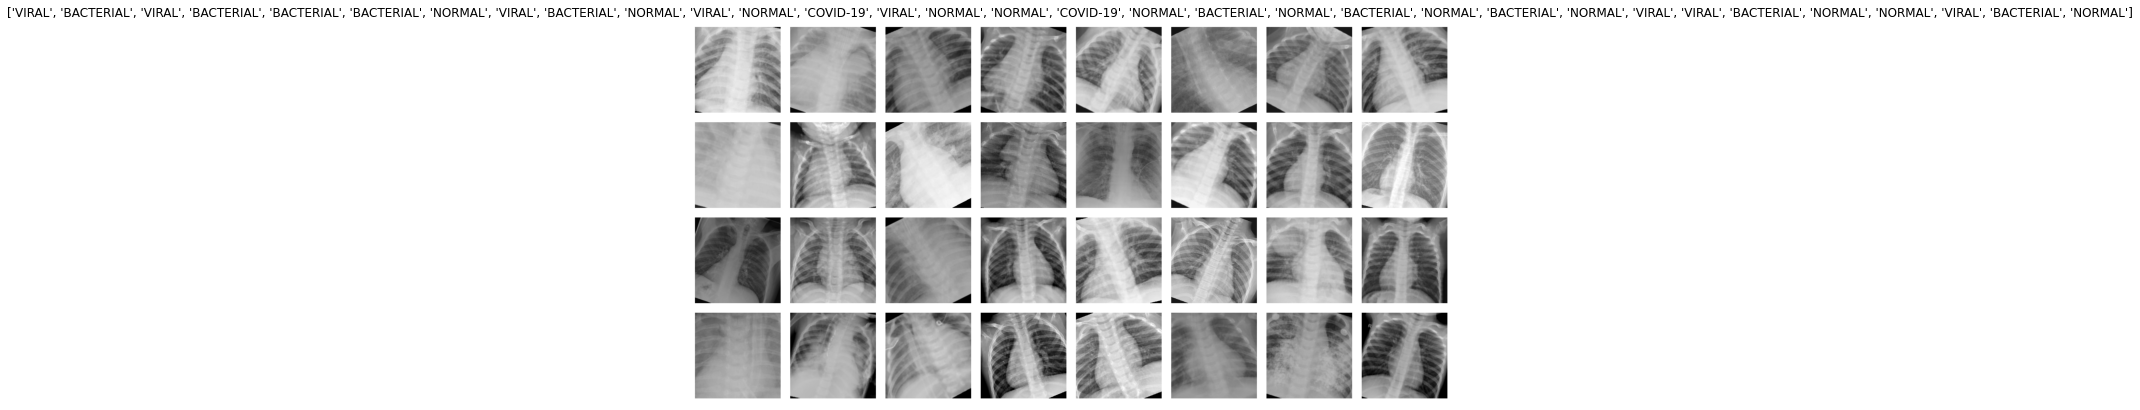

In [21]:
import matplotlib.pyplot as plt

def imshow(img, title):
    npimg = img.numpy()
    plt.figure(figsize=(15, 7))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images, padding=25)
    imshow(img, title=["COVID-19" if x==1 else  "NORMAL" if x == 2 else "VIRAL" if x == 3 else "BACTERIAL" for x in labels])

train_loader_base, val_loader_base, train_loader_red, val_loader_red = load_data()  

print('\nTrain')
print (get_count_metrics('train'))

print('\nTest')
print (get_count_metrics('val'))

#train_loader, val_loader = load_data()   
for i in range(2):
    show_batch_images(train_loader_base)
for i in range(2):
    show_batch_images(val_loader_base)